In [25]:
#1 Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#2 Import the dataset
mpg_df = pd.read_csv('auto-mpg.csv')

### 3. EDA of Data

In [27]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [29]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [30]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Step 4. Check and handle the missing values, if any.

In [31]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [32]:
hpIsDigit = pd.DataFrame(mpg_df.horsepower.str.isdigit())  # if the string is made of digits store True else False
mpg_df[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [33]:
# Missing values have a'?''
# Replace missing values with median
mpg_df['horsepower'].replace('?', np.nan, inplace = True)
#df['horsepower'] = df['horsepower'].replace(np.nan, median, inplace = True)

In [36]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [38]:
mpg_df["horsepower"] = mpg_df["horsepower"].astype("float")

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

In [41]:
print(mpg_df['horsepower'].corr(mpg_df['acceleration']))

-0.689195510334236


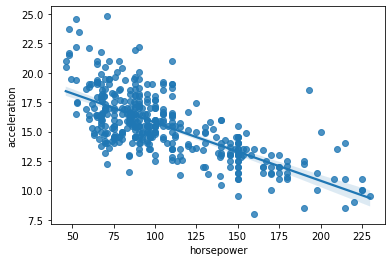

In [42]:
# use the function regplot to make a scatterplot
sns.regplot(x=mpg_df['horsepower'], y=mpg_df['acceleration'])
plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

### Insights : The accelation and horsepower are negatively correlated with coeff of -0.69

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

<IPython.core.display.Javascript object>


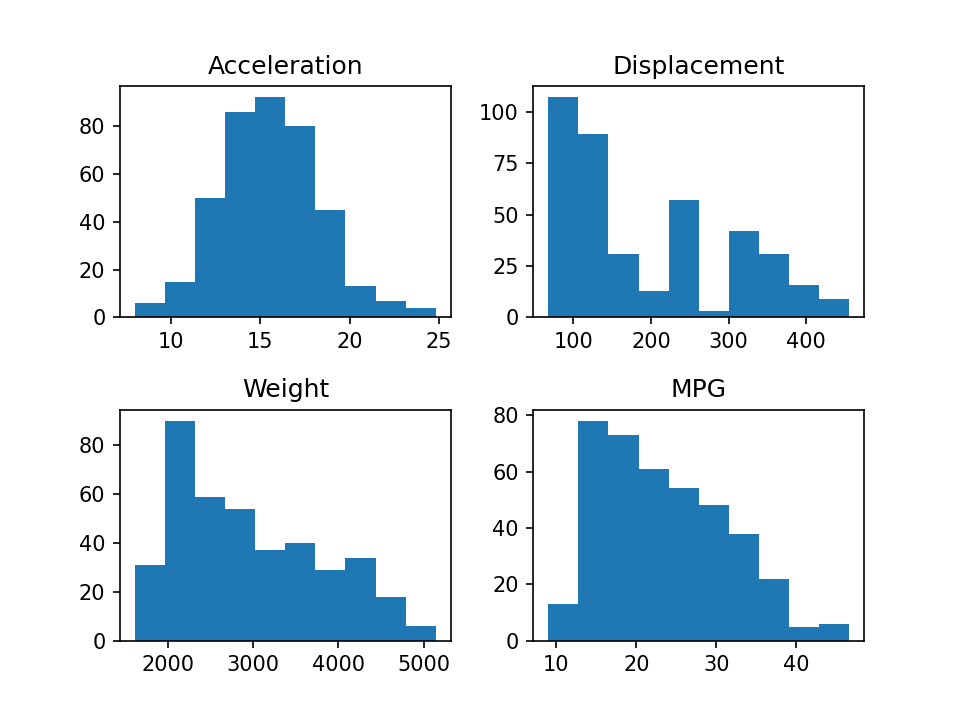

In [48]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(mpg_df.acceleration)
ax[0,0].set_title('Acceleration')
ax[0,1].hist(mpg_df.displacement)
ax[0,1].set_title('Displacement')
ax[1,0].hist(mpg_df.weight)
ax[1,0].set_title('Weight')
ax[1,1].hist(mpg_df.mpg)
ax[1,1].set_title('MPG')
plt.subplots_adjust(wspace=0.25, hspace=0.40)

### Insight: The accelaration appears to be normally distributed whereas the other 3 values are right skewed

In [51]:
df2 = mpg_df[mpg_df['origin'] == 2]
df2
plt.scatter(df2['displacement'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
19,26.0,4,97.0,46.0,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,2,audi 100 ls
22,25.0,4,104.0,95.0,2375,17.5,70,2,saab 99e
23,26.0,4,121.0,113.0,2234,12.5,70,2,bmw 2002
...,...,...,...,...,...,...,...,...,...
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
359,28.1,4,141.0,80.0,3230,20.4,81,2,peugeot 505s turbo diesel
360,30.7,6,145.0,76.0,3160,19.6,81,2,volvo diesel
375,36.0,4,105.0,74.0,1980,15.3,82,2,volkswagen rabbit l


### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file.

<IPython.core.display.Javascript object>


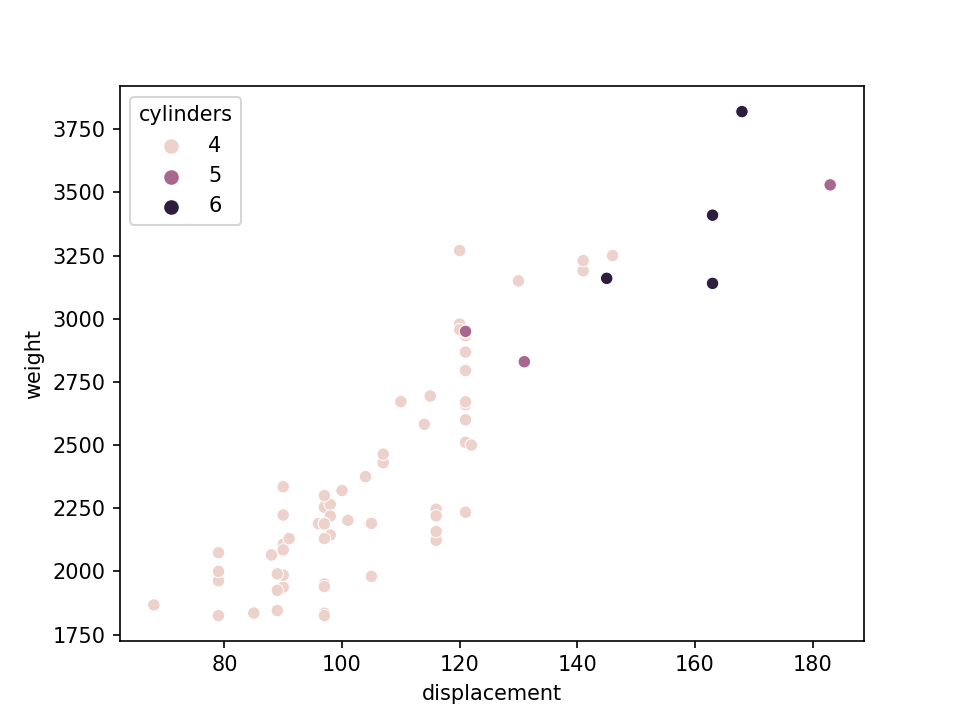

In [61]:
# use the function regplot to make a scatterplot
sns.scatterplot(data = df2, x='displacement', y='weight', hue = 'cylinders')
plt.savefig("Plotting_Correlation_Scatterplot_With_Hues_Fit.jpg")

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

C:\Users\U1138741\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


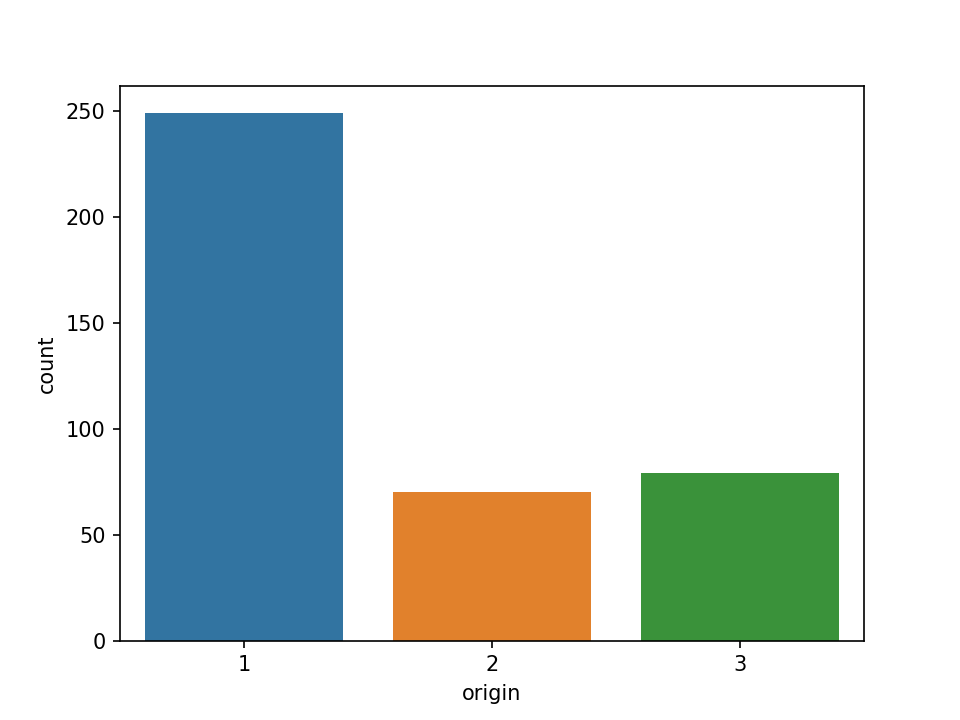

<AxesSubplot:xlabel='origin', ylabel='count'>

In [62]:
sns.countplot(mpg_df.origin)

### The highest cars are from origin 1 and least from origin 2. 

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

In [66]:
correlation = mpg_df.corr()['mpg']
correlation

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

### Insights : The mpg has strong negative correlation with cylinders, displacement , horsepower and  weight and a weak positive correlation with model year, accelaration and origin

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

<IPython.core.display.Javascript object>


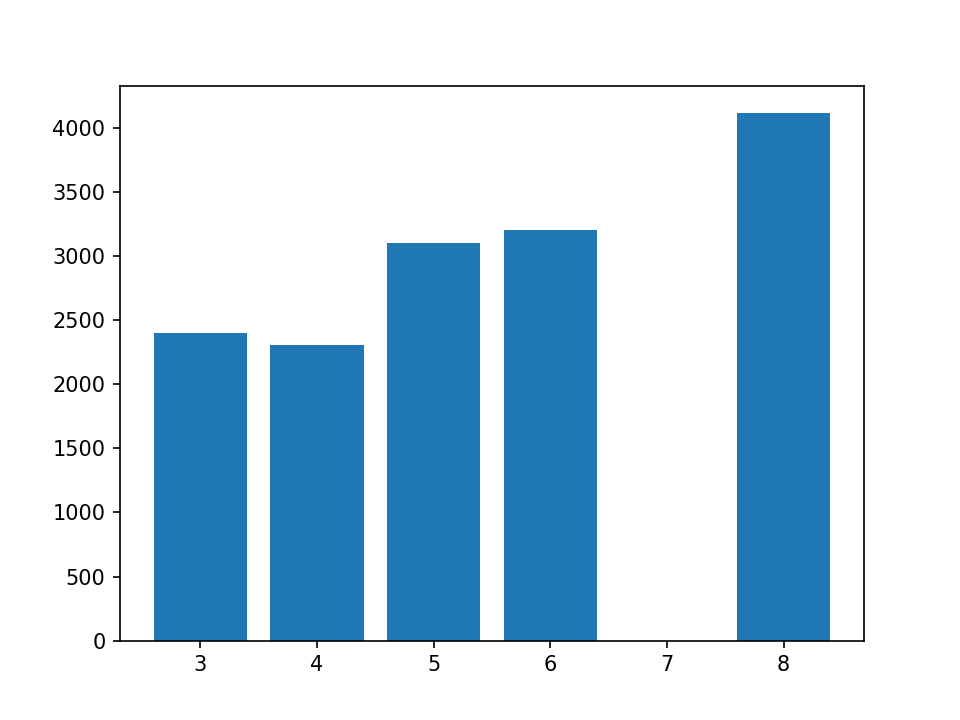

<BarContainer object of 5 artists>

In [75]:
a = mpg_df.groupby('cylinders')['weight'].mean()
b = np.array([3,4,5,6,8])
plt.bar(b,a)

### Insight:  The mean weight increases with increase in the number of cylinders

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

In [76]:
Q1 = mpg_df.quantile(0.25)
Q3 = mpg_df.quantile(0.75)
IQR = Q3 - Q1

In [77]:
((mpg_df < (Q1 - 1.5 * IQR)) | (mpg_df > (Q3 + 1.5 * IQR))).sum()

C:\Users\U1138741\AppData\Local\Temp\ipykernel_15952\1843379597.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((mpg_df < (Q1 - 1.5 * IQR)) | (mpg_df > (Q3 + 1.5 * IQR))).sum()


acceleration     7
car name         0
cylinders        0
displacement     0
horsepower      10
model year       0
mpg              1
origin           0
weight           0
dtype: int64

### Insight: Horsepower and accelaration have many outliers while the rest of the data does not have much outliers

### Step 12. Plot the correlations for variables.

In [80]:
mpg_df.drop(columns = ['car name'], inplace = True)

<IPython.core.display.Javascript object>


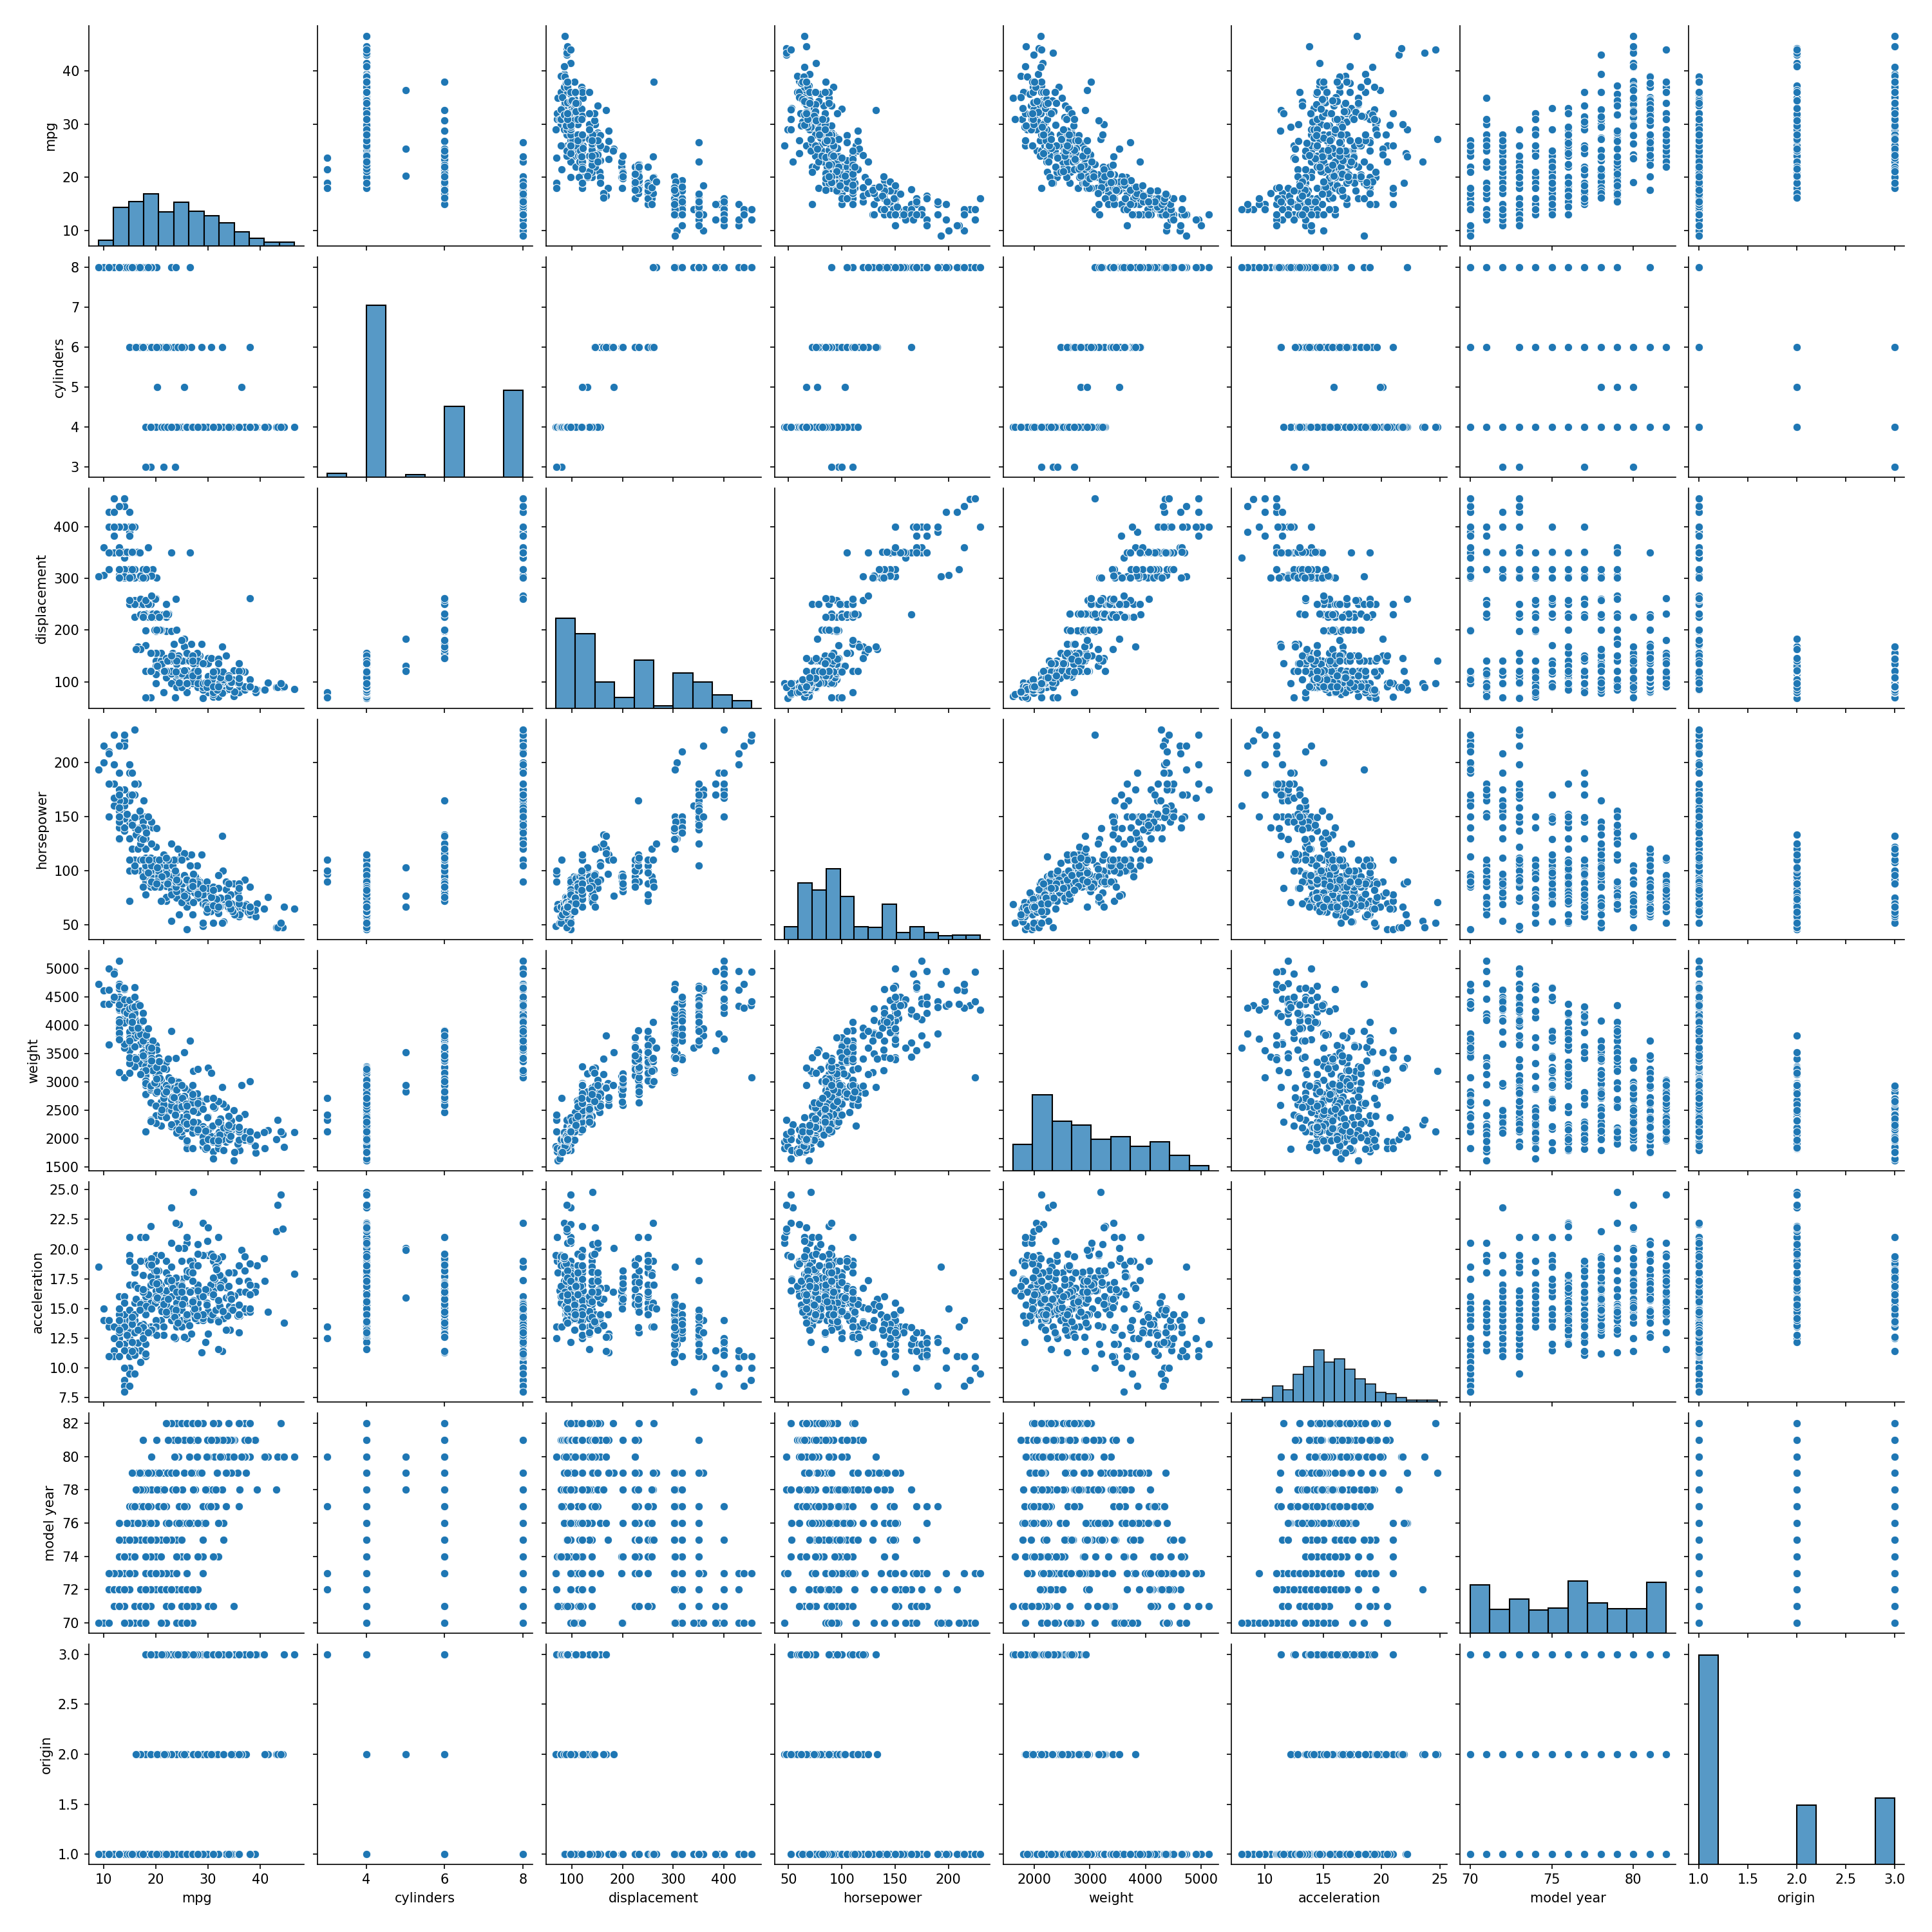

In [83]:
sns.pairplot(data = mpg_df)